In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

c:\Anaconda\envs\ML_Environment_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

In [3]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [6]:
df.drop(['CustomerID'], axis=1, inplace=True)
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [7]:
for column in df.columns:
    print(column, df[column].unique())

Age [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]
Gender ['Female' 'Male' nan]
Tenure [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36. nan]
Usage Frequency [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10. nan]
Support Calls [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8. nan]
Payment Delay [18.  8.  7. 26. 16. 15.  4. 11. 30. 25. 13. 22.  5. 14.  3. 10. 28.  2.
  6. 27. 12. 29. 17. 24.  9. 23. 21.  1.  0. 20. 19. nan]
Subscription Type ['Standard' 'Basic' 'Premium' nan]
Contract Length ['Annual' 'Monthly' 'Quarterly' nan]
Total Spend [932.   557.   185.   ... 829.59 804.3  9

In [8]:
#Analysing null values
df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
df.dropna(inplace=True, axis=0)

In [10]:
for column in df.columns:
    if df[column].dtype == np.object_:
        print(column, df[column].unique())

Gender ['Female' 'Male']
Subscription Type ['Standard' 'Basic' 'Premium']
Contract Length ['Annual' 'Monthly' 'Quarterly']


In [11]:
df1 = df.replace({'Female': 0, 'Male': 1})

C:\Users\Mohd Arshil\AppData\Local\Temp\ipykernel_12112\1221960653.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df.replace({'Female': 0, 'Male': 1})


In [12]:
for column in df1.columns:
    if df1[column].dtype == np.object_:
        print(column, df1[column].unique())

Subscription Type ['Standard' 'Basic' 'Premium']
Contract Length ['Annual' 'Monthly' 'Quarterly']


In [13]:
df1

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,25.0,0,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,26.0,1,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,28.0,1,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [13]:
y = df1['Churn']
X = df1.drop(['Churn'], axis=1)

In [14]:
#Instead of using get_dummies, we can use OneHotEncoder before model fitting
#X = pd.get_dummies(data=X, columns=['Subscription Type', 'Contract Length'], dtype=int)
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0


In [16]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 98.79it/s]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [30]:
grid = GridSearchCV(
    estimator=SGDClassifier(max_iter=1000),
    param_grid={
    },
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score)
    },
    refit='precision',
    cv=5,
    n_jobs=-1,
)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1, param_grid={},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict')})

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [41]:
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

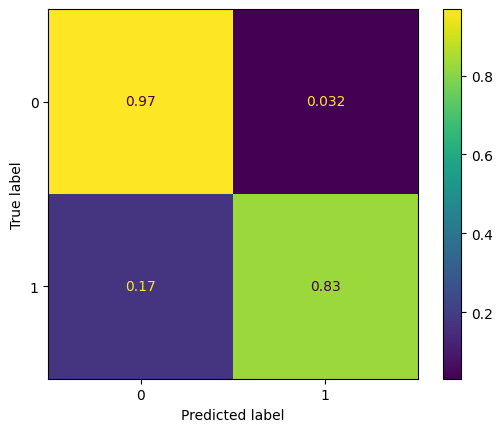

In [39]:
plot_cm(y_test, grid.predict(X_test))


In [37]:
from sklearn.metrics import recall_score

In [42]:
grid1 = GridSearchCV(
    estimator=SGDClassifier(max_iter=1000),
    param_grid={
    },
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='recall',
    cv=5,
    n_jobs=-1,
)

In [43]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1, param_grid={},
             refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

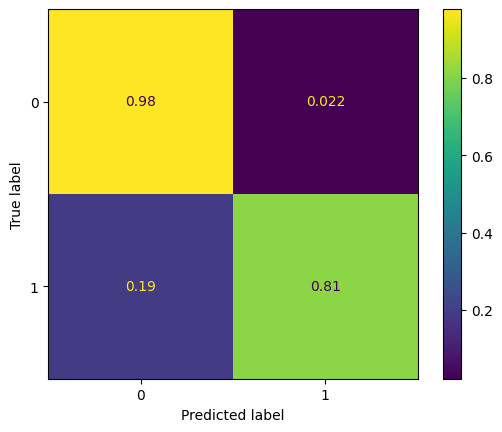

In [44]:
plot_cm(y_test, grid1.predict(X_test))

In [45]:
grid2 = GridSearchCV(
    estimator=SGDClassifier(max_iter=1000),
    param_grid={
    },
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='accuracy',
    cv=5,
    n_jobs=-1,
)

In [46]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1, param_grid={},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

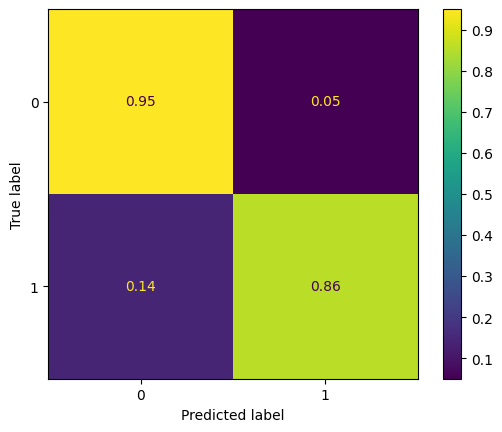

In [47]:
plot_cm(y_test, grid2.predict(X_test))

In [35]:
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

In [65]:
pipeline = make_pipeline(MinMaxScaler(), SGDClassifier(max_iter=2000))
grid3 = GridSearchCV(
    estimator=pipeline,
    param_grid={
    },
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='precision',
    cv=8,
    n_jobs=-1,
) 

In [66]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(max_iter=2000))]),
             n_jobs=-1, param_grid={}, refit='precision',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

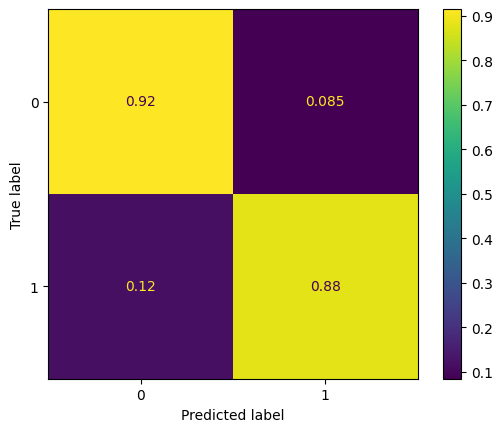

In [67]:
plot_cm(y_test, grid3.predict(X_test))

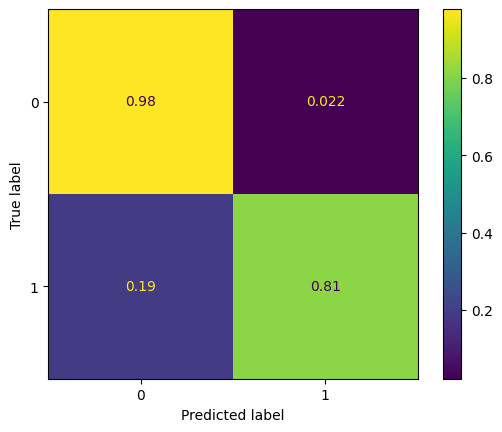

In [68]:
plot_cm(y_test, grid1.predict(X_test))

In [34]:
import joblib

In [74]:
with open('model.pkl', 'wb') as f:
    joblib.dump(grid1, f)

In [43]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore').set_output(transform='pandas')
cols_encoded = encoder.fit_transform(X[['Subscription Type', 'Contract Length']])   
X_encoded = pd.concat([X.drop(['Subscription Type', 'Contract Length'], axis=1), cols_encoded], axis=1)
X_encoded

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,0,39.0,14.0,5.0,18.0,932.00,17.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,396.00,29.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,1,32.0,20.0,5.0,8.0,617.00,20.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,716.38,8.0,0.0,1.0,0.0,1.0,0.0,0.0
440829,25.0,0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,1.0,0.0,1.0,0.0,0.0
440830,26.0,1,35.0,27.0,1.0,5.0,977.31,9.0,0.0,0.0,1.0,0.0,0.0,1.0
440831,28.0,1,55.0,14.0,2.0,0.0,602.55,2.0,0.0,0.0,1.0,0.0,0.0,1.0


In [89]:
pipeline = make_pipeline(MinMaxScaler(), SGDClassifier(max_iter=2000))
grid3 = GridSearchCV(
    estimator=pipeline,
    param_grid={
    },
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    },
    refit='recall',
    cv=4,
    n_jobs=-1,
) 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [91]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(max_iter=2000))]),
             n_jobs=-1, param_grid={}, refit='recall',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

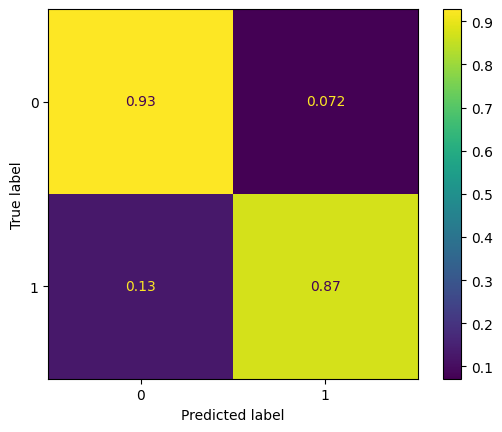

In [92]:
plot_cm(y_test, grid3.predict(X_test))

In [93]:
with open('model_encoded.pkl', 'wb') as f:
    joblib.dump(grid3, f)

with open('encoder.pkl', 'wb') as f:
    joblib.dump(encoder, f)

In [100]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [112]:
data = {
        "Age": 65.0,
        "Gender": 0,
        "Tenure": 49.0,
        "Usage Frequency": 1.0,
        "Support Calls": 10.0,
        "Payment Delay": 8.0,
        "Subscription Type": "Basic",
        "Contract Length": "Monthly",
        "Total Spend": 557.0,
        "Last Interaction": 6.0
    }

In [113]:
X.head(1)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0


In [118]:
pd.DataFrame([data])

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0


In [123]:
encoder.transform(pd.DataFrame([data])[['Subscription Type', 'Contract Length']])

,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1.0,0.0,0.0,0.0,1.0,0.0
